<a href="https://colab.research.google.com/github/Ruchika623/GIT-DEMO-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
# import libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# libraries for train test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading file
file = '/content/drive/MyDrive/titanic.csv'
df= pd.read_csv(file)

In the titanic data set there are 12 columns out of which one is the target label of the name survived

The passanger id, name,ticket,cabin are the columns which does not beart any informative value for building a model therefore they can be dropped

In [ ]:
#getting first 5 entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_ti =df.copy()

In [ ]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#dropping the columns passangerid, ticket, name, cabin
df_ti.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Name: The full name of the passenger.

👫 Sex: Gender of the passenger.

🎂 Age: Age of the passenger in years.

🧑‍🤝‍🧑 SibSp: Number of siblings or spouses aboard the Titanic.

👶 Parch: Number of parents or children aboard the Titanic.

📇 Ticket: Ticket number.

💰 Fare: The fare paid by the passenger.

🏠 Cabin: Cabin number.

🛳 Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
#getting dummies for columns such as sex and embarked
df_ti = pd.get_dummies(df_ti, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
#checking for null values
df_ti.isna().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [ ]:
#dropping null values
df_ti.dropna(inplace=True)

In [ ]:
df_ti.isna().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [ ]:
# replacing nan of age with mean value
df_ti.isna().sum()
df_ti['Age'].fillna(df_ti['Age'].mean(), inplace=True)


<ipython-input-54-061a3cd237cd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ti['Age'].fillna(df_ti['Age'].mean(), inplace=True)


In [ ]:
# replace fare with nan
df_ti['Fare'].fillna(df_ti['Fare'].mean(), inplace=True)

<ipython-input-55-9fc334e4a959>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ti['Fare'].fillna(df_ti['Fare'].mean(), inplace=True)


In [ ]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Sex_male    714 non-null    bool   
 7   Embarked_Q  714 non-null    bool   
 8   Embarked_S  714 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 41.1 KB


In [ ]:
df_tii = df_ti.astype(int)

In [ ]:
df_tii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    714 non-null    int64
 1   Pclass      714 non-null    int64
 2   Age         714 non-null    int64
 3   SibSp       714 non-null    int64
 4   Parch       714 non-null    int64
 5   Fare        714 non-null    int64
 6   Sex_male    714 non-null    int64
 7   Embarked_Q  714 non-null    int64
 8   Embarked_S  714 non-null    int64
dtypes: int64(9)
memory usage: 55.8 KB


In [ ]:
#getting first five entry
df_tii.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1


**EDA (Exploratory Data Analysis)**

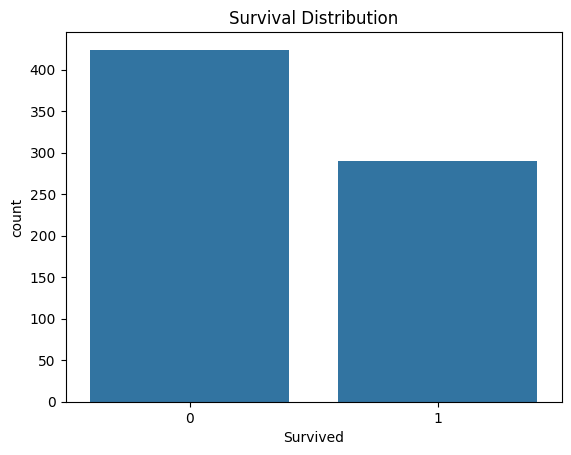

In [ ]:
# 1. Survived Distribution
sns.countplot(x='Survived', data=df_tii)
plt.title('Survival Distribution')
plt.show()

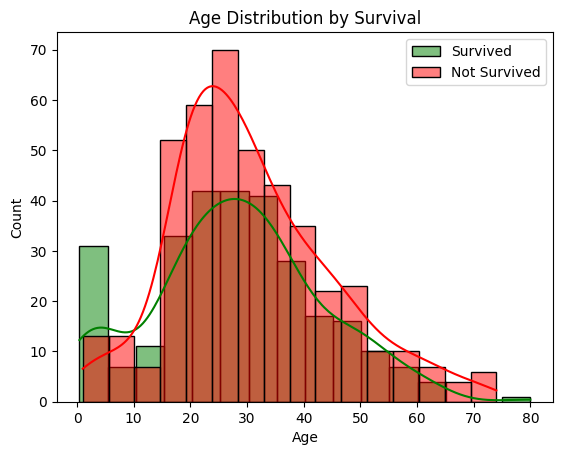

In [ ]:
# 2. Age Distribution by Survival
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label='Survived', color='g')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='r')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

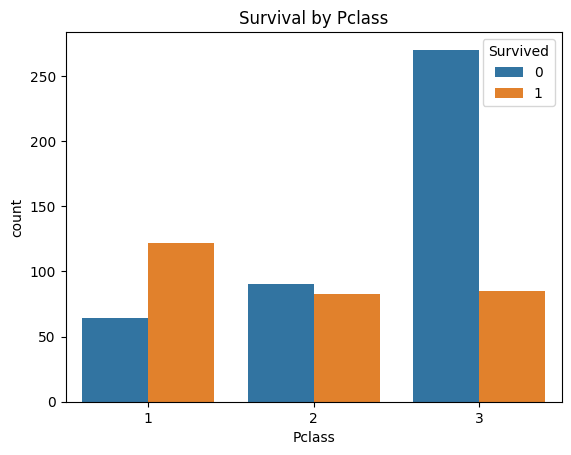

In [ ]:
# 3. Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=df_tii)
plt.title('Survival by Pclass')
plt.show()

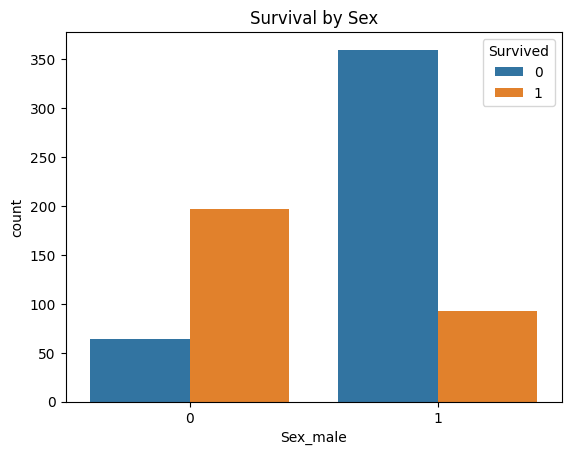

In [ ]:
#sex_male plotting
sns.countplot(x='Sex_male', hue='Survived', data=df_tii)
plt.title('Survival by Sex')
plt.show()

In [ ]:
df_tii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    714 non-null    int64
 1   Pclass      714 non-null    int64
 2   Age         714 non-null    int64
 3   SibSp       714 non-null    int64
 4   Parch       714 non-null    int64
 5   Fare        714 non-null    int64
 6   Sex_male    714 non-null    int64
 7   Embarked_Q  714 non-null    int64
 8   Embarked_S  714 non-null    int64
dtypes: int64(9)
memory usage: 55.8 KB


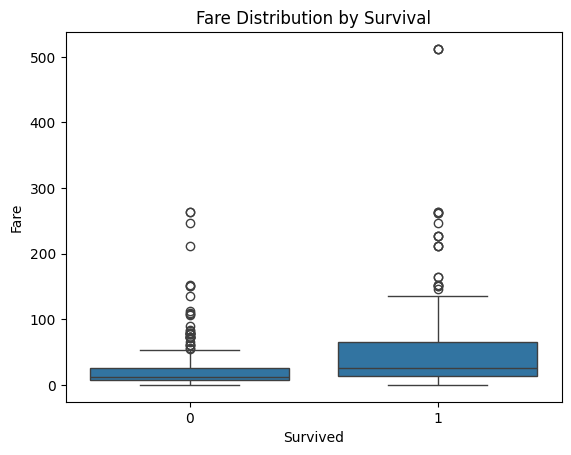

In [ ]:
# 6. Fare vs Survived
sns.boxplot(y='Fare', x='Survived', data=df_tii)
plt.title('Fare Distribution by Survival')
plt.show()


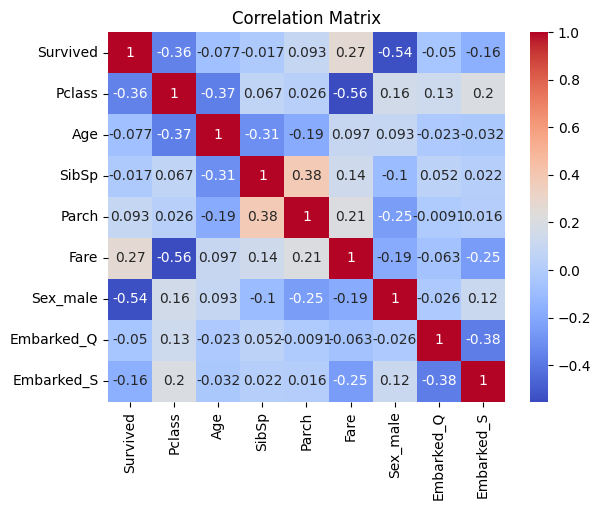

In [ ]:
# 7. Correlation Matrix
corr = df_tii.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As Sex_male increases (from 0 for females to 1 for males), the likelihood of survival decreases, so the correlation turns out negative.

A negative correlation here means that as Pclass increases (from 1 to 3), the survival rate tends to decrease. This is expected: higher class passengers are more likely to survive, and lower class passengers are less likely to survive.

In [ ]:
X= df_tii[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=df_tii["Survived"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# train test split
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
# K-Nearest Neighbor Algorithm
# the efficency of kNN is very goof for classification
# one of the most important Non Parametric model
# to select best value of k we need a small loop that test
# for the accuracy of the model
acc = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_x, train_y)
  y_pred = knn.predict(test_x)
  accuracy = accuracy_score(test_y, y_pred)
  acc.append(accuracy)


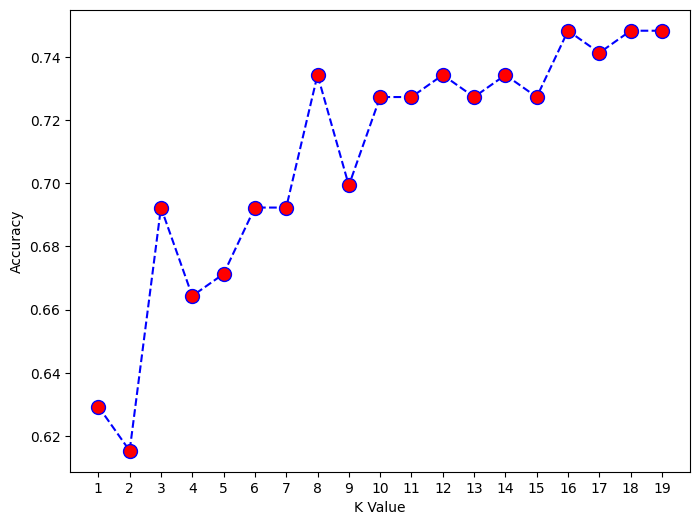

In [ ]:
# plot the accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1,20), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,20))
plt.show()

In [ ]:
# k= 16
knn_clf = KNeighborsClassifier(n_neighbors=16)
knn_clf.fit(train_x, train_y)
y_pred = knn_clf.predict(test_x)
df_knn = pd.DataFrame()
df_knn['Actual'] = test_y
df_knn['Predicted'] = y_pred

In [ ]:
df_knn.head()

,Actual,Predicted
222,0,0
555,0,0
390,1,1
377,0,1
426,1,0


In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(train_x, train_y)
y_pred_dt = dt_model.predict(test_x)
dt_accuracy = accuracy_score(test_y, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.6993006993006993


In [ ]:
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_x, train_y)
y_pred_rf = rf_model.predict(test_x)
rf_accuracy = accuracy_score(test_y, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.7132867132867133


In [ ]:
#Support Vector Classifier
svm_model = SVC(random_state=42)
svm_model.fit(train_x, train_y)
y_pred_svm = svm_model.predict(test_x)
svm_accuracy = accuracy_score(test_y, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.7622377622377622
